<center><h1> IFT-6758 : Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Homework - 2</h3></center> 



[Notebook](https://colab.research.google.com/drive/1CKUlvdEa1bJLS2_P7UeaPUWSZ_ZDUDSH) due November 06, 2020 at [23.59 EST](https://www.worldtimebuddy.com/?qm=1&lid=6077243&h=6077243&date=2020-11-06&sln=23-24) as **PDF** on [Gradescope](https://www.gradescope.com/courses/179325/assignments/773268)


In [ ]:
#@title Imports (Run this cell first) { run: "auto" }
plotting_library = "matplotlib"
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Not mandatory to use
from sklearn.utils import resample

import matplotlib.pyplot as plt

import seaborn as sns

# Uncomment this line below if using seaborn
#sns.set() 

%matplotlib inline

path = 'https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/{}'

## PCA

#### **Q1**

**12 points** = $(1.5 + 2 + 2 + 1.5 + 1.5 + 2 + 1.5)$

The cell below loads a subset of the California Housing dataset. 

  (a) Store only the `latitude`, `longitude` and `median_house_value` columns in a dataframe denoted by a variable `features`. Produce a scatter plot of the data points with `longitude` along x-axis, `latitude` along y-axis and the points colored by `median_house_value` i.e. higher the `median_house_value`, darker the data point in the plot.
  
  (b) Perform a PCA on the subset of the dataframe you created in (a) with only the `latitude` and `longitude` columns. Produce a scatter plot of the transformed data points with the first principal component `PC 1` along x-axis and second principal component `PC 2` along y-axis and the points colored by `median_house_value` just like in (a).

  (c) Provide a simple interpretation for what the first principal component `PC 1` could possibly represent in the plot in (b) by comparing it with that in (a). **Justify** your answer.
  
  (d) Repeat what you did in (b) above by setting the `whiten` parameter as `True` in the `PCA()` constructor and producing the plot. What difference do you observe? What do you think `whiten` does specifically in this problem?

  (e) Perform a PCA on the entire dataframe `features` with `whiten` set to `True` and produce a scatter plot of the transformed data points with the first principal component `PC 1` along x-axis and second principal component `PC 2` along y-axis and the points colored by `median_house_value` just like in (a).   

  (f) Observe how the color indicating `median_house_value` varies in the plot you produced in (e). Is the variation of `median_house_value` depicted in this plot simpler than what is indicated by all the above plots? Provide an **explanation** for why it is (or) it is not the case.
  
  (g) The California Department of Housing and Community Development (HCD) releases additional information about the data samples you used  here, by providing an `price_index` tag that can take values `high`, `middle` or `low` based `median_house_value`. If you were to eventually use the principal components you produced in (e), which one(s) among the `PC 1`, `PC 2`, ..,. would you use to classify the data samples into these three categories (`high`, `middle` and `low`)? Concretely **justify** your choice.  

**Bonus : (3 points)**
> (h) In the plot that you observe in (a), you will remark two major clusters that are the *darkest*. Let us identify the cluster with the higher value of `latitude` as the `SF cluster` and the one with the lower value of `latitude` as the `LA cluster`. Verify programmatically if this clustering is preserved or distorted in the plot in (e). What does this tell you about what is represented by the second principal component `PC 2` produced in (e)?



In [ ]:
housing = pd.read_csv(path.format('california_housing.csv'))

(a)

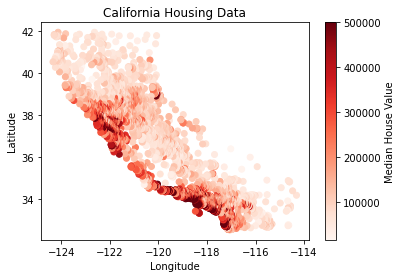

In [ ]:
features = housing[['latitude', 'longitude', 'median_house_value']]
plt.scatter(x=features['longitude'], y=features['latitude'], c=features['median_house_value'], cmap='Reds')
plt.colorbar(label='Median House Value')
plt.title('California Housing Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


(b) 

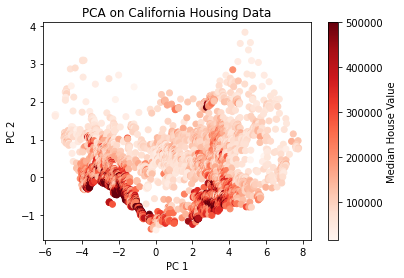

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features_r = pca.fit_transform(features[['latitude', 'longitude']])
plt.scatter(x=features_r[:, 0], y=features_r[:, 1], c=features['median_house_value'], cmap='Reds')

plt.colorbar(label='Median House Value')
plt.title('PCA on California Housing Data')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

(c) PC 1 captures the highest variance from graph in (a) i.e. the 45 degree angle anti-clockwise / diagnol / negative slope / along the coast line, etc

(d)

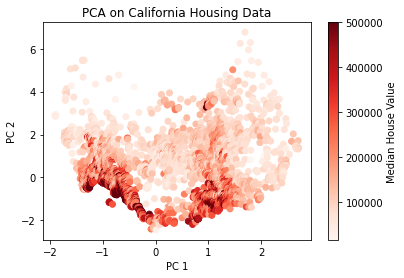

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True, n_components=2)
features_r = pca.fit_transform(features[['latitude', 'longitude']])
plt.scatter(x=features_r[:, 0], y=features_r[:, 1], c=features['median_house_value'], cmap='Reds')

plt.colorbar(label='Median House Value')
plt.title('PCA on California Housing Data')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

**What difference do you observe? What do you think whiten does specifically in this problem?**   

The scale along PC_1 is reduced and is increased along PC_2. Normalized. Less correlation








Whitening will remove some information from the transformed signal (the relative variance scales of the components) but can sometime improve the predictive accuracy of the downstream estimators by making their data respect some hard-wired assumptions.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

(e)

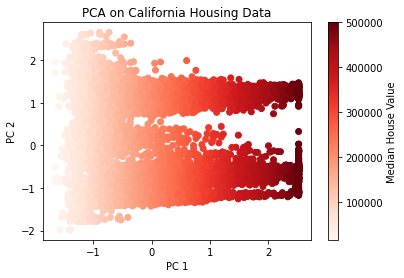

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True, n_components=2)
features_r = pca.fit_transform(features)
plt.scatter(x=features_r[:, 0], y=features_r[:, 1], c=features['median_house_value'], cmap='Reds')

plt.colorbar(label='Median House Value')
plt.title('PCA on California Housing Data')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

(f) PC_1 mapped the variance in 'Median House Value' directly.

(g) Correctly answered by a student:  
It appears that **PC 1** explains almost all the variance in the data and therefore will
be enough to corrctly classify a price_index. As we have observed that PC 1 is based almost solely on median_house_value it is reasonable to conclude that from the feature median_house_value we can correctly clasify the price range.



(h) Well answered by 'Pavlo Ruban'


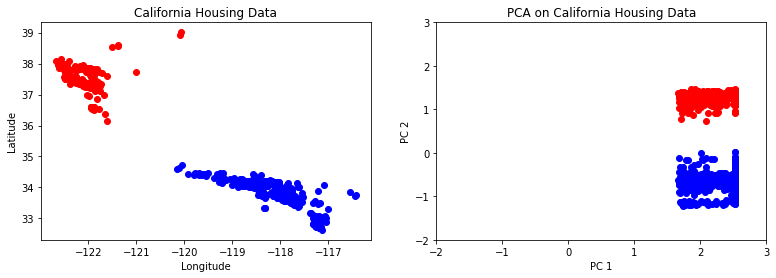

In [ ]:
SF_cltr = (features['latitude'] > 36) & (features['median_house_value'] > 400_000)
LA_cltr = (features['latitude'] < 35) & (features['median_house_value'] > 400_000)

fig, ax = plt.subplots(1,2, figsize=(13, 4))

ax[0].scatter(x=features['longitude'][SF_cltr], y=features['latitude'][SF_cltr], c='red', label='SF houses')
ax[0].scatter(x=features['longitude'][LA_cltr], y=features['latitude'][LA_cltr], c='blue', label='LA houses')
ax[0].set_title('California Housing Data')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

ax[1].scatter(x=features_r[:, 0][SF_cltr], y=features_r[:, 1][SF_cltr], c='red', label='SF houses')
ax[1].scatter(x=features_r[:, 0][LA_cltr], y=features_r[:, 1][LA_cltr], c='blue', label='LA houses')
ax[1].set_title('PCA on California Housing Data')
ax[1].set_xlabel('PC 1')
ax[1].set_ylabel('PC 2')
ax[1].set_xlim([-2, 3]);
ax[1].set_ylim([-2, 3]);

From the graph* of the PCA we see that these SF and LA clusters are well separable along PC 2. In addition,
the clusters become even tighter. This implies that PC 2 might be greatly influenced by latitude feature.


## Clustering

#### **Q2**

**10 points** = $(1 + 2 + 3 + 1.5 + 1.5 + 2)$

A bird detection system that is equipped with multiple sensors is deployed in an observation station in an open space and it detects and collects some information about birds that visit the space. For each detected bird, it is able to collect the following information: 

*   `position` - a value of the form (`x`,`y`,`z`) which indicates the coordinates in a three-dimensional space defined by the LiDAR field of the system. `x` and `y` coordinates are in the range (-500,500) whereas `z` coordinate is in the range (0,150) where 0 indicates the ground level for `z`.
*   `sound_level` - a value in decibels (0-120 dB) of the sound made by the detected bird with 0 indicating no audible sound and 120 indicating maximum sound that can be detected. 
*   `time_of_visit` -  a value indicating number of milliseconds since the 00:00 hours of the day of collection.

The system sends out a table with the above three fields periodically to you. You are leading a team of data scientists to explore if the data collected by this system can be used to distinguish the different species of birds visiting the station located in the open space.  

(a) You decide that using clustering for initially attempting this problem is a good option. How would you *logically* convince your team of this? 

(b) Your team is trying to decide between using K-means and hierarchical clustering, both based on an Euclidean distance measure. Propose a list of preprocessing operations to be performed on the before you use any clustering algorithm on the raw dataset. **Justify** why you include each step. 

(c) An enthusiastic intern in your team selects a subset of *raw* data samples from the dataset, selecting some nocturnal birds that visit all together exactly at midnight everyday and they cannot produce any sound. They all have been observed to consistently sit on the ground along a straight line. He generates the following dendrogram (left) using an agglomerative hierarchical clustering with an appropriate linkage that maximizes intercluster dissimilarity. On the right is a top-view visualization of the arrangement of the birds in the station, based on the dendrogram. The bird B1 has already been placed. Place the birds B2 - B9 on the line with an *appropriate* spacing between them. **Explain** your choice.

<br/>
<br/>

<img width=750 src="https://i.ibb.co/M2ymGvm/nocturnal-birds.png" alt="Nocturnal Birds" border="0" /> 


(d)  You are informed by a group of expert ornitholigists that groups of birds that belong to different species, tend to visit the station in almost equal numbers per species. Based on this information, what type of linkage would you use in the hierarchical clustering algorithm? **Justify** your choice.

(e) The group of ornithologists have identified that exactly 10 species of birds visit the station. Does this information help you decide between choosing the K-means and hierarchical clustering algorithms? **Explain** why/why not.

(f) Briefly outline any **two** ways in which you can verify if the clustering you have performed has captured the natural grouping that exists among the actual data samples.

(a)
* Brids of the same species will prefer to be in close proximity to one another
* Brids of the same species will emit the same sounds
* Birds of the same species will be active at the same time of day
* The dataset doesn't include labels

(b)
* Normalize position without spatial distortion (vector magnitude or coordinate transform)
* Normalize sound using (min_observed, max_observed)
* Normalize time of visit. Wrap around at 00:00 must be handled (eg. with sin,cos decomposition)
* Handle outliers and invalid data
* Perform some kind of data formatting to obtain rows and columns
* Perform some experiments with non-linear scaling for non-linear features (eg. decibel scale)

(c)

* One example (inter-node distance is important!):
  * 97-6--5---8-----43-2--1

(d)

* Average, complete, and Ward's linkage tend to yield balanced clusters.

(e)

No, knowing the number of clusters doesn't help the choice between the K-means and hierarchical clustering algorithms. This information can be used to improve the performance of both algorithms:
* A dendrogram can be cut at exactly 10 clusters
* K-means can be initialized with K=10

(f)

* Low variance inside clusters
* High variance between clusters
* Label some data and apply supervised learning
* Verify the number of unique clusters
* Dimensionality reduction and visualization of data
* Bootstrapping or cross-validation of data
* Other valid methods with citation

## Cross Validation

#### **Q3**

**10 points** = $(1 + 2 + 3 + 1.5 + 1 + 1.5)              $




Given below is a pair of plots generated while cross-validating a K-NN model trained on a dataset with various values of K using 12-fold CV and Leave-one-out (LOOCV) methods :                             

<img width=750 src="https://i.ibb.co/cyY7m6X/cv-graphs.png" alt="Trees" border="0" /> 

Answer the following questions:

(a) What is the motivation behind using cross-validation techniques such as LOOCV and k-fold CV over having a validation set?

(b) What could possibly explain the difference in the error curves in the two methods in the plots? 

(c) Describe how similar (or) different the error curves generated on the same dataset would look like for another independent run of **each of** the methods *12-fold* and *LOOCV*, compared to the plots above. **Explain** the reason for your answer in each case.    

(d) Under which circumstances would you would favour using LOOCV over k-fold CV?  

(e) Based on the above plots, what is the best value for the hyperparameter K of the model? **Explain why.** 

(f) What type of hyperparameter search do the above plots illustrate? **Explain**.



**Answers**

(a) The error estimate of the validation set can be highly variable based on the randomness due to the split of the data samples included in the training set and those included in the validation set. The validation set error rate may tend to overestimate or underestimate the model performance on the entire data set based on this split.

Cross-validation methods tend to overcome this problem by combining the model performane on multiple splits by averaging their performance to getter a better estimate of the generalization.  

(b) Both these methods split the samples in the dataset into $k$ different folds (subsets) and compute the error. 

The curves given above correspond to $k=12$ (12-fold CV) and $k=n$ (LOOCV) respectively, where $n$ is the size of the dataset (#samples). The difference in the curves is due to the fact that this value of $k$ is different in both cases, i.e. $n \ne 12$. 

The consequence of this is also that LOOCV suffers from high variance (in theory) despite producing unbiased estimates whereas the error estimates of 12-fold have higher bias.

(Explanation along the lines of bias-variance tradeoff being the 'cause' are acceptable if the link is explained clearly and there is mention about difference in #samples)

*Side note :*

Theoritically, the estimates of LOOCV suffer from higher variance than k-fold, in this case the graphs indicate the opposite as an example dataset that gives this counter-intuitive effect has been chosen. The reason for this counter-intuitive behavior is due to 2 reasons :
* The dataset is very small (but $n>12$) for the model to sufficiently generalize (no matter which CV is used to test this)
* The model trained is $k$-NN which is very sensitive to the neighbors - LOOCV has more #neigbors to compute as it has more samples in training compared to k-fold.

(c)

* 12-fold :
    
    The curve will be different than what is shown above.

    Reason - Another independent run results in a different random split of the samples into 12 folds. This variability in the division of the samples into folds causes some variability in the CV estimates.

* LOOCV :
    
    The curve will be exactly same as what is shown above.

    Reason - Another independent run results in the same set of splits of the samples - there is no randomness involved as all samples but 1 are used for training and evaluated on the held-out sample. There is no variability in the division of the samples for the CV estimate.


(d) 
* Datasets of smaller size / Less number of data samples available
* When unbiased estimates of model performance are critical  

(e) Best value of K = 5 - because the error is minimum for thus value and the model performance is expected to be best among the other values considered. The 12-fold plot could be considered to give a better picture for model selection over the LOOCV plot as it is supposed to have less variance in estimate.

(f) Grid search - because from the plots we see that the cross-validation model performance is evaluated for each value of the hyperparameter K in the continuous range of integers in [1,12]

## Inference and Bootstrapping

#### **Q4**

**16 points** = $(1.5 + 1.5 + 1.5 + 1.5 + 2 + 2 + 1.5 + 1.5 + 1.5 + 1.5)$

The dataset loaded in the next cell consists of data from a drug trial experiment.  
* `subject_type` indicates 0 for if a subject is a *control* and 1 if taking *treatment*. 
* `daily_dosage` indicates the dosage of the drug in millilitres (mL)
* `life_expectancy` show the projected age (year) upto which that the subject is expected to live.

Let the field `subject_type` in the dataset correspond to $x_{type}$, `daily_dosage` to $x_{dosage}$ and `life_expectancy` to $y$.

  (a) Now, consider the regression : 
  $$y = \beta_{dosage} x_{dosage} + \beta_{type} x_{type} + \beta_{0} + \epsilon$$

  Write your code to perform this regression and list the coefficient estimates $\hat{\beta}_{dosage}$, $\hat{\beta}_{type}$ and $\hat{\beta}_{0}$ that you obtained by running your code.

  (b) Run a bootstrap of the dataset over 500 iterations, and collect the coefficients $\hat{\beta}_{dosage}$, $\hat{\beta}_{type}$ and $\hat{\beta}_{0}$ that you obtain in each iteration. 

  (c) Use the coefficient estimates that you collected in (b) and estimate the standard errors of all the 3 coefficients $S.E.(\hat{\beta}_{dosage})$, $S.E.(\hat{\beta}_{type})$ and $S.E.(\hat{\beta}_{0})$. 
  
  (d) Plot a histogram to observe the distribution of each of the collected coefficient estimates. What do you observe?

  (e) Provide a 95% confidence interval for each of the coefficient estimates. What does this interval mean?

  (f) Generate the scatterplot for the points in the dataset with `daily_dosage` on the x-axis, `life_expectancy` on the y-axis and the points colored by the `subject_type` value (separate colors to indicate the types 0 and 1) with the collected 500 bootstrap sampled fits overlaid. To make the plot easier to read, reduce the transparency of the lines.

  (g) Based on all the above, **explain** intuitively what is conveyed by the plot you generated in (f).
    
  (h) Make a scatterplot of the bootstrapped coefficients, $\left(\beta_{type}^{\ast}, \beta_{dosage}^{\ast}\right)$ against one another. **Comment** on the overall distribution of these two coefficients **and** the nature of correlation between them.
  
  (i) Similar to above, estimate the coefficient estimates $\hat{\beta}_{dosage}$ and $\hat{\beta}_{0}$ and the standard error of the dosage coefficient $S.E.(\hat{\beta}_{dosage})$ by bootstrapping the dataset over 500 iterations and fitting the dataset in the regression : 
  $$y = \beta_{dosage} x_{dosage} + \beta_{0} + \epsilon$$
  
  (j) Comparing the results in (i) and (c), what can you comment about the relationship of `daily_dosage` and `subject_type` with `life_expectancy`? 

**Bonus : (3 points)**
> (k) In a bootstrap of the dataset over 500 iterations similar to the above, perform an independent t-test with an $\alpha=0.05$ significance level, using `scipy.stats.ttest_ind` on the `life_expectancy` of these two groups . Collect the p-values and plot the p-value histogram. 

In [ ]:
trials = pd.read_csv(path.format('drug-trials.csv'))

In [ ]:
# q4(a) 1
# similar answers also acceptable
X = trials[['daily_dosage', 'subject_type']]
y = trials['life_expectancy']

model = LinearRegression(fit_intercept=True)
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

65.67943220081068
[0.27154927 5.6681168 ]


In [ ]:
# q4(b) 2
num_iterations = 500
coefs = list()
intercepts = list()
for i in range(0, num_iterations):
    sampled_index = np.random.choice(range(0, len(y)), len(y))
    X_samples = X.iloc[sampled_index]
    y_samples = y.iloc[sampled_index]
    lr = LinearRegression()
    lr.fit(X_samples, y_samples)
    coefs.append(lr.coef_)
    intercepts.append(lr.intercept_)

In [ ]:
# q4(c) 3
coef_array=np.array(coefs).reshape(num_iterations,-1)
intercepts_array=np.array(intercepts)
n_sample = len(coef_array) - 2
mean = coef_array[:,0].mean()
standard_error = np.sqrt(((coef_array[:, 0] - model.coef_[0]) ** 2).sum() / n_sample)
print(f"SE(beta_hat[dosage]): {standard_error}")

standard_error = np.sqrt(((coef_array[:, 1] - model.coef_[1]) ** 2).sum() / n_sample)
print(f"SE(beta_hat[type]): {standard_error}")

standard_error = np.sqrt(((intercepts_array - model.intercept_) ** 2).sum()/ n_sample)
print(f"SE(beta_hat[0]): {standard_error}")

SE(beta_hat[dosage]): 0.11445880186370648
SE(beta_hat[type]): 1.7700411914220178
SE(beta_hat[0]): 2.2812732337641686


Text(0.5, 1.0, '$\\hat\\beta0$')

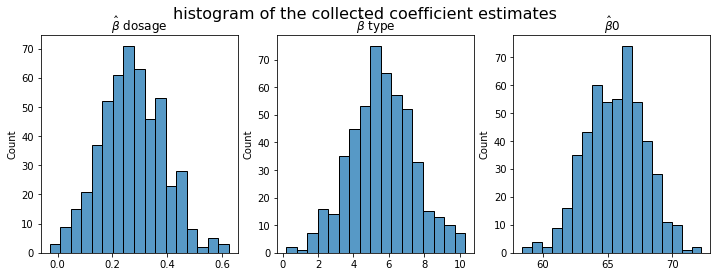

In [ ]:
# q4(d) 4
coef_array=np.array(coefs).reshape(num_iterations,-1)
intercepts_array=np.array(intercepts)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('histogram of the collected coefficient estimates', fontsize=16)
g = sns.histplot(coef_array[:, 0], ax=ax[0])
g.set_title(r'$\hat\beta$ dosage')
g = sns.histplot(coef_array[:, 1], ax=ax[1])
g.set_title(r'$\hat\beta$ type')
g = sns.histplot(intercepts_array, ax=ax[2])
g.set_title(r'$\hat\beta_0$')

Observation: Normal distribution

In [ ]:
# q4(e) 5
# Confidence interval
def cal_conf_interval(coefs_data, coefs_name):
    confidence_percentage = 95
    # p-values
    p = (100-confidence_percentage)/2
    # Quartiles
    lower = np.percentile(coefs_data, p)
    upper = np.percentile(coefs_data, 100 - p)
    print('{:s} ({:d}%) confidence interval = [{:.2f},{:.2f}]'
    .format(coefs_name, int(confidence_percentage), lower, upper))

In [ ]:
cal_conf_interval(coef_array[:, 0], 'hat beta dosage')

hat beta dosage (95%) confidence interval = [0.05,0.49]


In [ ]:
cal_conf_interval(coef_array[:, 1], 'hat beta type')

hat beta type (95%) confidence interval = [1.91,9.60]


In [ ]:
cal_conf_interval(intercepts_array, 'hat beta 0')

hat beta 0 (95%) confidence interval = [61.04,70.39]


The 95% interval essentially we just computed essentially means that there is a 95% chance
that our true parameter values lie in this range.

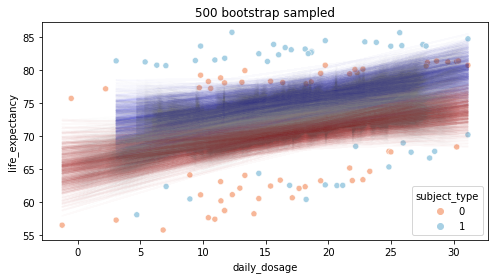

In [ ]:
# q4(f) 6
fig, ax = plt.subplots(figsize=(8, 4))
g = sns.scatterplot(y=y, x=X.daily_dosage, hue = X.subject_type, palette="RdBu", legend
=True)
g.set_ylabel("life_expectancy")
g.set_xlabel("daily_dosage")
g.set_title("500 bootstrap sampled")
num_iterations = 500
# Bootstrapping loop: with replacement
for i in range(0, num_iterations):
    sampled_index = np.random.choice(range(0, len(y)), len(y))
    X_samples = X.iloc[sampled_index]
    y_samples = y.iloc[sampled_index]
    lr = LinearRegression()
    lr.fit(X_samples, y_samples)
    plt.plot(X.daily_dosage, lr.predict(X), color='grey', alpha=0.01, zorder=1)
    plt.plot(X[X.subject_type ==0].daily_dosage, lr.predict(X[X.subject_type ==0]), color='red', alpha=0.01, zorder=1)
    plt.plot(X[X.subject_type ==1].daily_dosage, lr.predict(X[X.subject_type ==1]), color='blue', alpha=0.01, zorder=1)

q4(g): 
- Many regression lines that don't fit the data
completely.
- Many of the bootstraping samples gave us the regression
coefficients that don't completely fit our original sample data

Text(0.5, 1.0, '500 bootstrap coefficients corelation ')

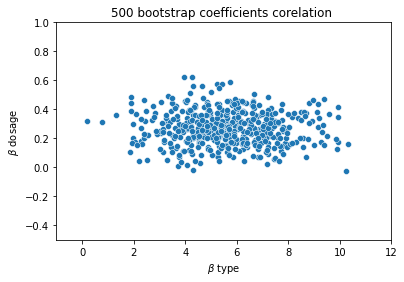

In [ ]:
# q4(h) 7
coef_array=np.array(coefs).reshape(num_iterations,-1)
fig, ax = plt.subplots(figsize=(6, 4))
g = sns.scatterplot( x=coef_array[:,1], y=coef_array[:,0],legend=False, ax= ax)
ax.set_xlim(-1,12)
ax.set_ylim(-0.5,1)
g.set_ylabel(r"$\beta$ dosage")
g.set_xlabel(r"$\beta$ type")
g.set_title("500 bootstrap coefficients corelation ")

- Distribution: [Normal](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)
- Correlation: weak

In [ ]:
# num_iterations = 500
# coefs = list()
# intercepts = list()
# for i in range(0, num_iterations):
#     sampled_index = np.random.choice(range(0, len(y)), len(y))
#     X_samples = X2[sampled_index]
#     y_samples = y.iloc[sampled_index]
#     lr = LinearRegression()
#     lr.fit(X_samples, y_samples)
#     coefs.append(lr.coef_)
#     intercepts.append(lr.intercept_)

In [ ]:
# q4(i) 8
X2 = X.daily_dosage.values.reshape(-1, 1)

model2 = LinearRegression(fit_intercept=True)
model2.fit(X2, y)
print(model2.intercept_)
print(model2.coef_)

67.60343306682739
[0.30461684]


In [ ]:
coef_array=np.array(coefs).reshape(num_iterations,-1)
intercepts_array=np.array(intercepts)
n_sample = len(coef_array) - 2
standard_error = np.sqrt(((coef_array[:,0] - model2.coef_[0]) ** 2).sum() / n_sample)
print(f"SE(beta_hat[dosage]): {standard_error}")
standard_error = np.sqrt(((intercepts_array - model2.intercept_) ** 2).sum()/ n_sample)
print(f"SE(beta_hat[0]): {standard_error}")

SE(beta_hat[dosage]): 0.11956812178027247
SE(beta_hat[0]): 2.4889033173763173


q4(j) 9
life_expectancy is more
dependent on dosage than it is with subject_type . Which means dosage is a more
important feature in determining life_expectancy 

Text(0.5, 1.0, 'p-value histogram')

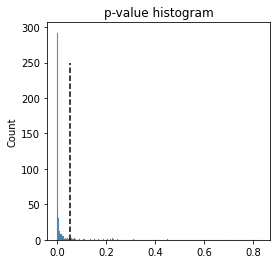

In [ ]:
# q4(k) 10
import scipy
num_iterations = 500
pvalues = list()
y_subtype0 = y[X.subject_type==0]
y_subtype1 = y[X.subject_type==1]
# Bootstrapping loop: with replacement
for i in range(0, num_iterations):
    sampled_index = np.random.choice(range(0, len(y_subtype0)),50)
    y_samples0 = y_subtype0.iloc[sampled_index]
    sampled_index = np.random.choice(range(0, len(y_subtype1)), 50)
    y_samples1 = y_subtype1.iloc[sampled_index]
    indrst = scipy.stats.ttest_ind(y_samples0, y_samples1)
    pvalues.append(indrst.pvalue)
pvalues_array=np.array(pvalues).reshape(num_iterations,-1)
fig, ax = plt.subplots(figsize=(4,4))
g = sns.histplot(pvalues, ax=ax)
plt.vlines(0.05,0,250, linestyles='--', label='lower')
g.set_title(r'p-value histogram');

## Feature Engineering

#### **Q5**

**4 points** = $(1.5 + 2.5)$                

Given below is a cell that loads a dataset that contains features representing the body measurements of certain types of sharks in various regions in Canada.

Using programming, perform analyses using the following methods to identify the outlier samples in the dataset : 

  (a) For each *feature* among `body_length`, `fin_length` and `tail_length` in the dataset, use a box plot to visualize the feature values (along y-axis) grouped by `region` feature (show on x-axis). Identify the `region` and `feature` (other than `region`) that shows the highest number of outliers. 

  (b) For the `region` and the `feature` you chose in (a), use the Q3-Q1 Inter-Quartile Range (IQR) to identify and list the rows of the outliers from the dataframe. 


In [ ]:
sharks = pd.read_csv(path.format('ca-sharks.csv'))

(a)

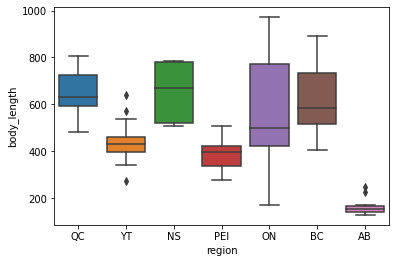

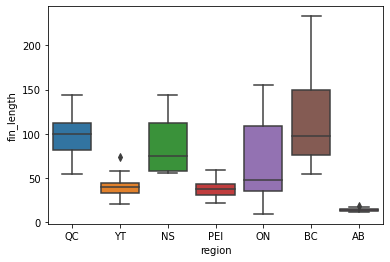

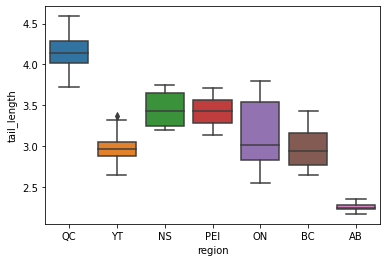

In [ ]:
features = ['body_length', 'fin_length', 'tail_length']
for feature in features:
    sns.boxplot(x='region', y=feature, data=sharks)
    plt.show()

(b)

In [ ]:
# select sharks in YT
YT_sharks = sharks[sharks['region'] == 'YT']
# select body_length of Yukon sharks
body_length = YT_sharks['body_length']
body_length_Q1 = np.percentile(body_length, 25) 
body_length_Q3 = np.percentile(body_length, 75) 
body_length_IQR = body_length_Q3 - body_length_Q1 
high = body_length_Q3 + 1.5 * body_length_IQR
low = body_length_Q1 - 1.5 * body_length_IQR
outliers = ~((YT_sharks['body_length'] < high) & (YT_sharks['body_length'] > low))
outliers_ids = YT_sharks[outliers]['id']

print('The following Yukon sharks are outliers, based on body length:')
sharks.loc[sharks['id'].isin(outliers_ids)][["id","region", "body_length"]]

The following Yukon sharks are outliers, based on body length:


,id,region,body_length
35,36,YT,272.3920
53,54,YT,570.5584
54,55,YT,639.7450


#### **Q6**

**8 points** = $(1 + 3 + 2 + 2 )$                

For the questions below, answer briefly by inspecting the dataset below. (There is no need to use any programming) :

This is a representative subset of a collected dataset with information about used buses across three Canadian cities. A model needs to be fit to predict the selling price `Price($)` of a bus. `--` indicates that the information is not available. 

ID|City|Province|Vehicle model|Category|Mileage(kmpl)|Certification|Year|Num_Damages|Price($) 
--|--|--|--|--|--|--|--|--|--|
1|Montréal|QC|CX-120|School|2.5|Certified|2018|3|44900
2|Vancouver|BC|AL-100|Tourism|5|Not certified|2016|--|22380
3|Toronto|ON|WS-978|Tourism|--|Certified|--|--|30000
4|Vancouver|BC|RR8|Factory|1.5|Certified|2012|5|10500
5|Toronto|ON|GH-50|Factory|4.5|Not certified|2015|--|12000
6|Montréal|QC|--|School|--|Not certified|2010|--|8000


(a) List the features that you would remove from the dataset before using it for model fitting. Give valid **reasons** for your answer.

Answer: 

*   `ID` is redundant.
*   `Province`: This feature could be less important as we already have City feature.
+ Other acceptable answers.



(b) List the features that need to be encoded in this dataset and outline which encoding schemes your would use in each case. Give valid **reasons** for your answer.

Answer: 
*   `City` . One-hot encoding 
*   `Vehicle` model . One-hot encoding 
*   `Category` . One-hot encoding
*   `Certification` . Binary encoding
*    `Year` . Categorical / One-hot



(c) What type of an imputation scheme would make sense for the missing values in each of the fields `Year` and `Mileage`? Give valid **reasons** for your answer.

 Answer: We can compute  and impute the appropriate values based on the built Year.

*  For `Year` , replace the missing values with the mode, since it is the most statistically probable value.
* For `Mileage` , replace the missing values with the mean of the mileage per category/model. Since the mean value tends to fall within a range that represents "typical" values, using it for imputation should not influence model predictions significantly.


(d) You propose to use the simplest sparsity-based method to select the best features among those given in the dataset. In just two lines, describe the high-level procedure to do this.

Answer: Lasso (L1) regularizer. 